#### Importing Libraries
- *pandas*: Data manipulation and analysis.
- *seaborn*: Data visualization.
- *sklearn*: Model selection, Naive Bayes, Logistic Regression, and metrics.
- *tensorflow.keras.datasets*: Loading the MNIST dataset.
- *sklearn.preprocessing*: Feature scaling using StandardScaler.
- *matplotlib.pyplot*: Plotting and visualizations.
- *numpy*: Numerical computations.

In [194]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Loading and Preprocessing the MNIST Dataset

- The **MNIST** dataset is loaded using `mnist.load_data()`, providing training and testing sets with images and corresponding labels.
- The image data is reshaped into a 2D array (flattened) and scaled by dividing by 255.0 to normalize the pixel values to the range [0, 1].

In [195]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
train_filter, test_filter = (y_train == 9) | (y_train == 8), (y_test == 9) | (y_test == 8)
X_train = X_train[train_filter]
y_train = y_train[train_filter]
X_test = X_test[test_filter]
y_test = y_test[test_filter]
y_train = (y_train == 9).astype(int)
y_test = (y_test == 9).astype(int)

In [196]:
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0
print(X_train.shape, X_test.shape)

(11800, 784) (1983, 784)


#### Feature Scaling

- A **StandardScaler** is applied to scale the features of the training and testing data.
- The **fit_transform()** method is used on the training data to compute the mean and standard deviation, and then scale the data.
- The **transform()** method is applied to the testing data using the statistics derived from the training data to ensure consistency.

In [197]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Performance on a Complex Dataset


#### Model Training and Evaluation

- **Naive Bayes**:
  - A **Gaussian Naive Bayes** model is trained on the scaled training data.
  - The model predicts the labels for the test data, and accuracy is computed using `accuracy_score()`.

- **Logistic Regression**:
  - A **Logistic Regression** model is trained with a maximum of 1000 iterations.
  - The model makes predictions on the test set, and accuracy is evaluated using `accuracy_score()`.

Both models' performance is compared based on accuracy.

In [198]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

In [199]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [200]:
print(f'Naive Bayes Accuracy: {acc_nb:.2f}')
print(f'Logistic Regression Accuracy: {acc_lr:.2f}')

Naive Bayes Accuracy: 0.87
Logistic Regression Accuracy: 0.97


#### Model Evaluation: Confusion Matrix and Classification Report

- **Confusion Matrix**:
  - The **confusion matrix** for both the **Naive Bayes** and **Logistic Regression** models is computed using `confusion_matrix()`. It provides a detailed view of how well each model performed, showing the true positives, false positives, true negatives, and false negatives.

- **Classification Report**:
  - The **classification report** for both models is generated using `classification_report()`. This includes key metrics such as precision, recall, F1-score, and support for each class, allowing a comprehensive evaluation of model performance.

These metrics provide insights into the performance of both models across different aspects of classification.

In [201]:
cf_nb = confusion_matrix(y_test, y_pred_nb)
cf_lr = confusion_matrix(y_test, y_pred_lr)
print("Naive Bayes Confusion Matrix:")
print(cf_nb)
print("Logistic Regression Confusion Matrix:")
print(cf_lr)

Naive Bayes Confusion Matrix:
[[744 230]
 [ 27 982]]
Logistic Regression Confusion Matrix:
[[945  29]
 [ 29 980]]


In [202]:
cr_nb = classification_report(y_test, y_pred_nb)
cr_lr = classification_report(y_test, y_pred_lr)
print("Naive Bayes Classification Report:")
print(cr_nb)
print("Logistic Regression Classification Report:")
print(cr_lr)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       974
           1       0.81      0.97      0.88      1009

    accuracy                           0.87      1983
   macro avg       0.89      0.87      0.87      1983
weighted avg       0.89      0.87      0.87      1983

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       974
           1       0.97      0.97      0.97      1009

    accuracy                           0.97      1983
   macro avg       0.97      0.97      0.97      1983
weighted avg       0.97      0.97      0.97      1983



#### ROC Curve Comparison

- **Naive Bayes ROC Curve**:
  - The **Receiver Operating Characteristic (ROC)** curve for the Naive Bayes model is plotted, showing the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various thresholds.
  - The **AUC (Area Under the Curve)** value for Naive Bayes is also displayed on the plot to quantify its classification performance.

- **Logistic Regression ROC Curve**:
  - The ROC curve for the Logistic Regression model is similarly plotted, with the corresponding **AUC** value shown.
  - A **Random Guess** baseline (diagonal line) is included for reference.

These plots allow for a visual comparison of both models' ability to distinguish between classes, with higher AUC values indicating better performance.

In [203]:
y_prob_nb = nb.predict_proba(X_test)[:, 1]
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [204]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

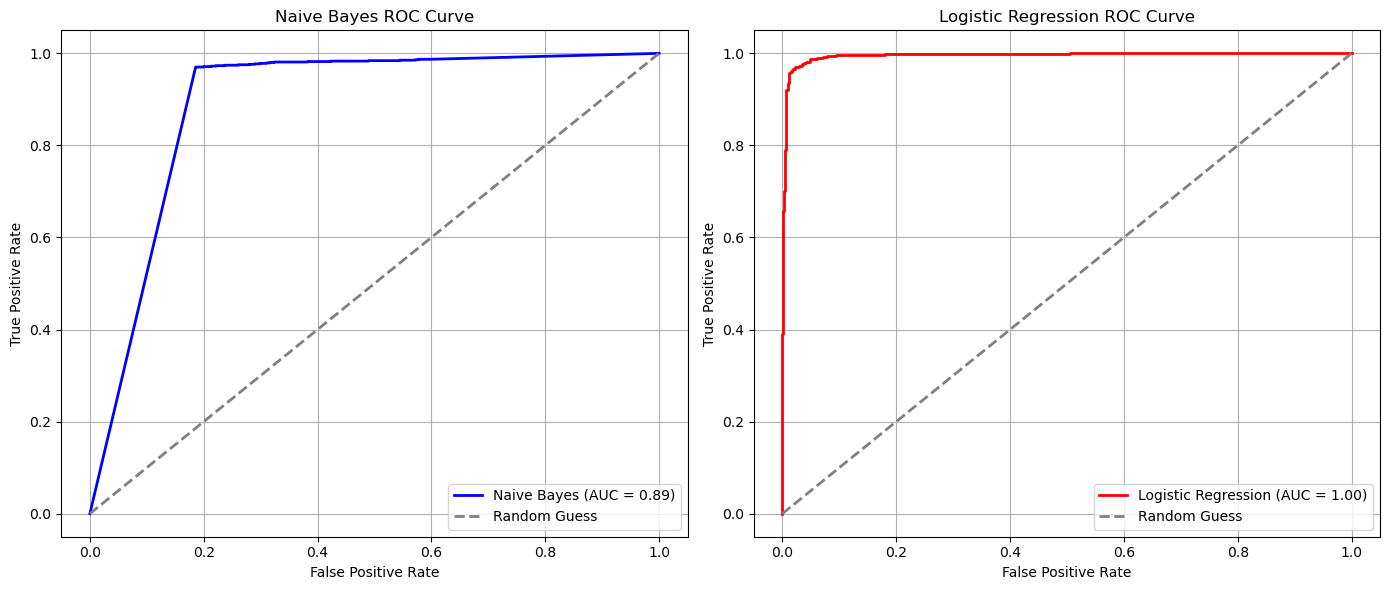

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
ax[0].plot([0, 1], [0, 1], color='gray', lw=2, label='Random Guess', linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Naive Bayes ROC Curve')
ax[0].legend(loc='lower right')
ax[0].grid()

ax[1].plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', lw=2, label='Random Guess', linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Logistic Regression ROC Curve')
ax[1].legend(loc='lower right')
ax[1].grid()

plt.tight_layout()
plt.show()

In [206]:
def compute_lift_gain(y_true, y_prob, num_deciles=10):
    y_true = pd.Series(y_true).reset_index(drop=True)
    y_prob = pd.Series(y_prob).reset_index(drop=True)
    df = pd.DataFrame({'Actual': y_true, 'Probability': y_prob})
    df = df.sort_values('Probability', ascending=False)
    df['Decile'] = pd.qcut(df['Probability'], q=num_deciles, labels=False, duplicates='drop')
    gain, lift, positives, count, cumulative_positives, cumulative_percentage, decile = [], [], [], [], [], [], []
    df['Decile'] = num_deciles - df['Decile']
    grouped = df.groupby('Decile')
    total_positives = df['Actual'].sum()
    cum_positives = 0
    for i in grouped.groups.keys():
        decile.append(i)
        grouped_df = grouped.get_group(i)
        positives_in_decile = grouped_df['Actual'].sum()
        positives.append(positives_in_decile)
        count.append(len(grouped_df))
        cum_positives += positives_in_decile
        cumulative_positives.append(cum_positives)
        cumulative_percentage.append(cum_positives / total_positives if total_positives != 0 else 0)
        gain.append(cum_positives / total_positives if total_positives != 0 else 0)
        lift.append((cum_positives / total_positives) / (i / num_deciles) if total_positives != 0 else 0)
    return pd.DataFrame({'Decile': decile,
                         'Positives': positives, 
                         'Count': count,
                         'Cumulative Positives': cumulative_positives, 
                         'Cumulative Percentage': cumulative_percentage, 
                         'Lift': lift, 
                         'Gain': gain})

In [207]:
lift_gain_lr = compute_lift_gain(y_test, y_prob_lr)
lift_gain_nb = compute_lift_gain(y_test, y_prob_nb)

print("Logistic Regression Lift and Gain:")
print(lift_gain_lr)
print("Naive Bayes Lift and Gain:")
print(lift_gain_nb)

Logistic Regression Lift and Gain:
   Decile  Positives  Count  Cumulative Positives  Cumulative Percentage  \
0       1        199    199                   199               0.197225   
1       2        197    198                   396               0.392468   
2       3        198    198                   594               0.588702   
3       4        194    198                   788               0.780971   
4       5        185    198                   973               0.964321   
5       6         34    199                  1007               0.998018   
6       7          1    198                  1008               0.999009   
7       8          1    198                  1009               1.000000   
8       9          0    198                  1009               1.000000   
9      10          0    199                  1009               1.000000   

       Lift      Gain  
0  1.972250  0.197225  
1  1.962339  0.392468  
2  1.962339  0.588702  
3  1.952428  0.780971  
4  1.928

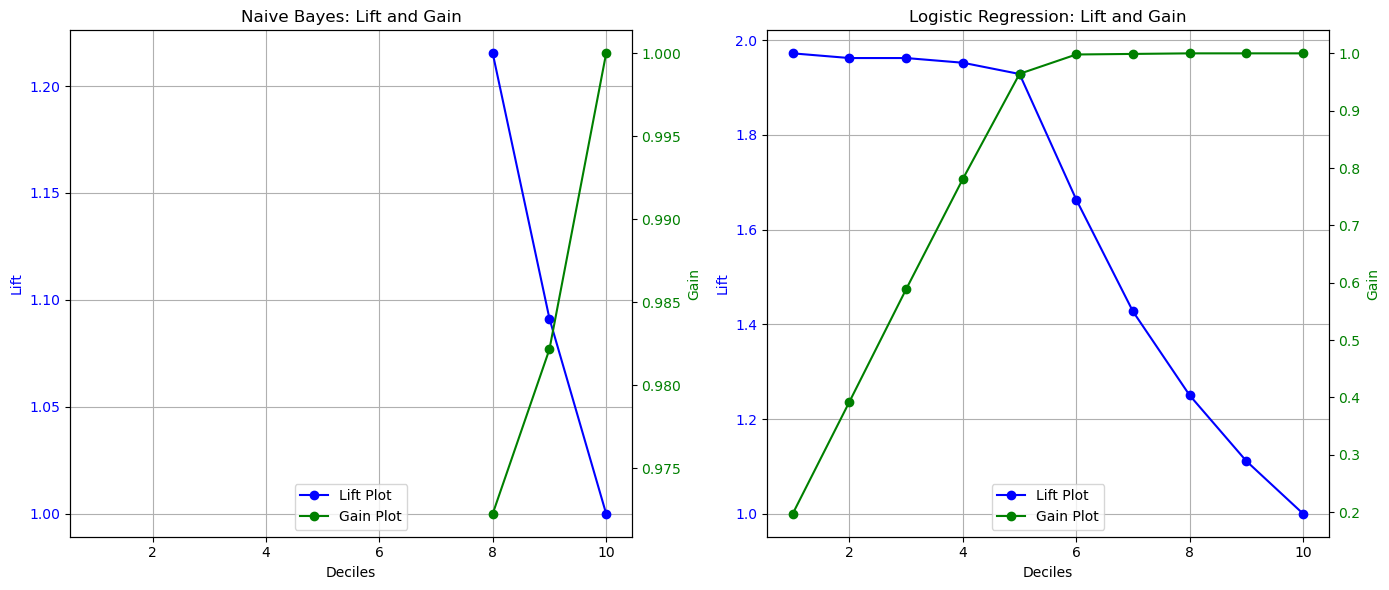

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(lift_gain_nb['Decile'], lift_gain_nb['Lift'], label="Lift Plot", marker='o', color='blue')
axes[0].set_title("Naive Bayes: Lift and Gain")
axes[0].set_xlabel("Deciles")
axes[0].set_ylabel("Lift", color='blue')
axes[0].tick_params(axis='y', labelcolor='blue')
ax2_0 = axes[0].twinx()
ax2_0.plot(lift_gain_nb['Decile'], lift_gain_nb['Gain'], label="Gain Plot", marker='o', color='green')
ax2_0.set_ylabel("Gain", color='green')
ax2_0.tick_params(axis='y', labelcolor='green')
lines_0, labels_0 = axes[0].get_legend_handles_labels()
lines_2_0, labels_2_0 = ax2_0.get_legend_handles_labels()
axes[0].legend(lines_0 + lines_2_0, labels_0 + labels_2_0, loc='lower center')
axes[0].grid()

axes[1].plot(lift_gain_lr['Decile'], lift_gain_lr['Lift'], label="Lift Plot", marker='o', color='blue')
axes[1].set_title("Logistic Regression: Lift and Gain")
axes[1].set_xlabel("Deciles")
axes[1].set_ylabel("Lift", color='blue')
axes[1].tick_params(axis='y', labelcolor='blue')
ax2_1 = axes[1].twinx()
ax2_1.plot(lift_gain_lr['Decile'], lift_gain_lr['Gain'], label="Gain Plot", marker='o', color='green')
ax2_1.set_ylabel("Gain", color='green')
ax2_1.tick_params(axis='y', labelcolor='green')
lines_1, labels_1 = axes[1].get_legend_handles_labels()
lines_2_1, labels_2_1 = ax2_1.get_legend_handles_labels()
axes[1].legend(lines_1 + lines_2_1, labels_1 + labels_2_1, loc="lower center")
axes[1].grid()

plt.tight_layout()
plt.show()

## 5. Performance on a Complex Dataset
### Discussion and Insights:

To assess the performance of Naive Bayes (NB) and Logistic Regression (LR) on a more complex dataset, we applied the models to filtered MNIST data, focusing on two classes (8 and 9). The results show a notable difference in the performance of the two models.

#### Evaluation:
- **Accuracy**:
  - Naive Bayes achieved an accuracy of 0.87, indicating that it performed well but made some misclassifications due to the increased complexity of the data.
  - Logistic Regression outperformed Naive Bayes with a significantly higher accuracy of 0.97, demonstrating its ability to handle the complex features of the MNIST dataset more effectively.

- **Confusion Matrices**:
  - Naive Bayes struggled to correctly classify instances of class 8, resulting in a higher number of false positives and false negatives (744 true positives, 230 false negatives, and 27 false positives for class 8).
  - Logistic Regression showed a more balanced and accurate classification, with fewer misclassifications (945 true positives, 29 false negatives, and 29 false positives for class 8).

- **Classification Reports**:
  - Naive Bayes:
    - Precision and recall were lower for class 8 compared to class 9, leading to an overall F1-score of 0.85 for class 8 and 0.88 for class 9.
    - The weighted average F1-score was 0.87, reflecting the model's moderate performance.
  - Logistic Regression:
    - Precision, recall, and F1-scores were consistent across both classes at 0.97, indicating excellent performance in classifying both digits.
    - The weighted average F1-score of 0.97 highlights the model's robustness.

- **AUC**:
  - The AUC for Logistic Regression was perfect at 1.0, signifying that the model is highly effective at discriminating between classes 8 and 9.
  - Naive Bayes achieved an AUC of 0.89, which, while good, is significantly lower than Logistic Regression, reflecting its challenges in dealing with the complexity of the data.

#### Insights:
- **Model Performance**:
  - Logistic Regression consistently outperformed Naive Bayes across all metrics on the complex MNIST dataset. Its superior ability to model the decision boundary without relying on feature independence assumptions makes it more suitable for this task.
  - Naive Bayes' reliance on the assumption of feature independence led to suboptimal performance, particularly for class 8, which may have overlapping or correlated features.

- **Behavior Across Datasets**:
  - The difference in performance between the two models is more pronounced on the MNIST dataset compared to the simpler penguin dataset. While both models performed perfectly on the simpler task, Logistic Regression demonstrated its advantage in handling complex, high-dimensional data like images.

- **Generative vs Discriminative Models**:
  - This analysis underscores the limitations of generative models like Naive Bayes when applied to complex datasets. Logistic Regression, as a discriminative model, is better equipped to handle such challenges due to its focus on the decision boundary rather than the underlying data distribution.

In conclusion, while Naive Bayes is a computationally efficient choice for simpler tasks, Logistic Regression is better suited for complex datasets like MNIST, where feature correlations and non-linear patterns significantly impact model performance.